In [3]:
from Automated_Surface_Event_Detection import surface_event_detection

Title: Trained Machine Learning Model to Detect Surface Events from Seismograms
Keywords: 
Publication date: 2024-04-23
DOI: 10.5281/zenodo.11043908
Total size: 102.7 MB

Link: https://zenodo.org/record/11043908/files/best_rf_model_top_50_features_50_100.joblib   size: 102.7 MB
best_rf_model_top_50_features_50_100.joblib is already downloaded correctly.
All files have been downloaded.


File 'best_rf_model_top_50_features_50_100.joblib' removed successfully.


In [4]:
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times = surface_event_detection()

100%|██████████| 60/60 [00:00<00:00, 544714.81it/s]

100%|██████████| 60/60 [00:00<00:00, 742354.69it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

*** Feature extraction started ***
14



  2%|▏         | 1/55 [00:00<00:14,  3.83it/s]

*** Feature extraction started ***
14



  4%|▎         | 2/55 [00:00<00:12,  4.39it/s]

*** Feature extraction started ***
14



  5%|▌         | 3/55 [00:00<00:11,  4.62it/s]

*** Feature extraction started ***
14



  7%|▋         | 4/55 [00:00<00:10,  4.64it/s]

*** Feature extraction started ***
14



  9%|▉         | 5/55 [00:01<00:10,  4.61it/s]

*** Feature extraction started ***
14



 11%|█         | 6/55 [00:01<00:10,  4.58it/s]

*** Feature extraction started ***
14



 13%|█▎        | 7/55 [00:01<00:10,  4.53it/s]

*** Feature extraction started ***
14



 15%|█▍        | 8/55 [00:01<00:10,  4.51it/s]

*** Feature extraction started ***
14



 16%|█▋        | 9/55 [00:01<00:10,  4.50it/s]

*** Feature extraction started ***
14



 18%|█▊        | 10/55 [00:02<00:10,  4.42it/s]

*** Feature extraction started ***
14



 20%|██        | 11/55 [00:02<00:09,  4.44it/s]

*** Feature extraction started ***
14



 22%|██▏       | 12/55 [00:02<00:09,  4.46it/s]

*** Feature extraction started ***
14



 24%|██▎       | 13/55 [00:02<00:09,  4.44it/s]

*** Feature extraction started ***
14



 25%|██▌       | 14/55 [00:03<00:09,  4.45it/s]

*** Feature extraction started ***
14



 27%|██▋       | 15/55 [00:03<00:09,  4.39it/s]

*** Feature extraction started ***
14



 29%|██▉       | 16/55 [00:03<00:08,  4.36it/s]

*** Feature extraction started ***
14



 31%|███       | 17/55 [00:03<00:08,  4.34it/s]

*** Feature extraction started ***
14



 33%|███▎      | 18/55 [00:04<00:08,  4.29it/s]

*** Feature extraction started ***
14



 35%|███▍      | 19/55 [00:04<00:08,  4.24it/s]

*** Feature extraction started ***
14



 36%|███▋      | 20/55 [00:04<00:08,  4.22it/s]

*** Feature extraction started ***
14



 38%|███▊      | 21/55 [00:04<00:08,  4.22it/s]

*** Feature extraction started ***
14



 40%|████      | 22/55 [00:05<00:07,  4.24it/s]

*** Feature extraction started ***
14



 42%|████▏     | 23/55 [00:05<00:07,  4.17it/s]

*** Feature extraction started ***
14



 44%|████▎     | 24/55 [00:05<00:07,  4.16it/s]

*** Feature extraction started ***
14



 45%|████▌     | 25/55 [00:05<00:07,  4.18it/s]

*** Feature extraction started ***
14



 47%|████▋     | 26/55 [00:05<00:06,  4.14it/s]

*** Feature extraction started ***
14



 49%|████▉     | 27/55 [00:06<00:06,  4.15it/s]

*** Feature extraction started ***
14



 51%|█████     | 28/55 [00:06<00:06,  4.17it/s]

*** Feature extraction started ***
14



 53%|█████▎    | 29/55 [00:06<00:06,  4.20it/s]

*** Feature extraction started ***
14



 55%|█████▍    | 30/55 [00:06<00:06,  4.11it/s]

*** Feature extraction started ***
14



 56%|█████▋    | 31/55 [00:07<00:05,  4.09it/s]

*** Feature extraction started ***
14



 58%|█████▊    | 32/55 [00:07<00:05,  4.13it/s]

*** Feature extraction started ***
14



 60%|██████    | 33/55 [00:07<00:06,  3.53it/s]

*** Feature extraction started ***
14



 62%|██████▏   | 34/55 [00:08<00:05,  3.61it/s]

*** Feature extraction started ***
14



 64%|██████▎   | 35/55 [00:08<00:05,  3.78it/s]

*** Feature extraction started ***
14



 65%|██████▌   | 36/55 [00:08<00:04,  3.92it/s]

*** Feature extraction started ***
14



 67%|██████▋   | 37/55 [00:08<00:04,  4.03it/s]

*** Feature extraction started ***
14



 69%|██████▉   | 38/55 [00:09<00:04,  4.10it/s]

*** Feature extraction started ***
14



 71%|███████   | 39/55 [00:09<00:03,  4.14it/s]

*** Feature extraction started ***
14



 73%|███████▎  | 40/55 [00:09<00:03,  4.16it/s]

*** Feature extraction started ***
14



 75%|███████▍  | 41/55 [00:09<00:03,  4.24it/s]

*** Feature extraction started ***
14



 76%|███████▋  | 42/55 [00:09<00:03,  4.18it/s]

*** Feature extraction started ***
14



 78%|███████▊  | 43/55 [00:10<00:02,  4.23it/s]

*** Feature extraction started ***
14



 80%|████████  | 44/55 [00:10<00:02,  4.25it/s]

*** Feature extraction started ***
14



 82%|████████▏ | 45/55 [00:10<00:02,  4.27it/s]

*** Feature extraction started ***
14



 84%|████████▎ | 46/55 [00:10<00:02,  4.30it/s]

*** Feature extraction started ***
14



 85%|████████▌ | 47/55 [00:11<00:01,  4.33it/s]

*** Feature extraction started ***
14



 87%|████████▋ | 48/55 [00:11<00:01,  4.36it/s]

*** Feature extraction started ***
14



 89%|████████▉ | 49/55 [00:11<00:01,  4.35it/s]

*** Feature extraction started ***
14



 91%|█████████ | 50/55 [00:11<00:01,  4.34it/s]

*** Feature extraction started ***
14



 93%|█████████▎| 51/55 [00:12<00:00,  4.35it/s]

*** Feature extraction started ***
14



 95%|█████████▍| 52/55 [00:12<00:00,  4.28it/s]

*** Feature extraction started ***
14



 96%|█████████▋| 53/55 [00:12<00:00,  4.26it/s]

*** Feature extraction started ***
14



 98%|█████████▊| 54/55 [00:12<00:00,  4.26it/s]

*** Feature extraction started ***
14



100%|██████████| 60/60 [00:00<00:00, 597763.04it/s]

100%|██████████| 60/60 [00:00<00:00, 746760.36it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

*** Feature extraction started ***
14



  2%|▏         | 1/56 [00:00<00:14,  3.69it/s]

*** Feature extraction started ***
14



  4%|▎         | 2/56 [00:00<00:13,  3.96it/s]

*** Feature extraction started ***
14



  5%|▌         | 3/56 [00:00<00:13,  3.99it/s]

*** Feature extraction started ***
14



  7%|▋         | 4/56 [00:00<00:12,  4.07it/s]

*** Feature extraction started ***
14



  9%|▉         | 5/56 [00:01<00:13,  3.69it/s]

*** Feature extraction started ***
14



 11%|█         | 6/56 [00:01<00:13,  3.67it/s]

*** Feature extraction started ***
14



 12%|█▎        | 7/56 [00:01<00:15,  3.20it/s]

*** Feature extraction started ***
14



 14%|█▍        | 8/56 [00:02<00:13,  3.51it/s]

*** Feature extraction started ***
14



 16%|█▌        | 9/56 [00:02<00:12,  3.69it/s]

*** Feature extraction started ***
14



 18%|█▊        | 10/56 [00:02<00:11,  3.83it/s]

*** Feature extraction started ***
14



 20%|█▉        | 11/56 [00:02<00:11,  4.00it/s]

*** Feature extraction started ***
14



 21%|██▏       | 12/56 [00:03<00:10,  4.13it/s]

*** Feature extraction started ***
14



 23%|██▎       | 13/56 [00:03<00:10,  4.21it/s]

*** Feature extraction started ***
14



 25%|██▌       | 14/56 [00:03<00:09,  4.25it/s]

*** Feature extraction started ***
14



 27%|██▋       | 15/56 [00:03<00:09,  4.27it/s]

*** Feature extraction started ***
14



 29%|██▊       | 16/56 [00:04<00:09,  4.30it/s]

*** Feature extraction started ***
14



 30%|███       | 17/56 [00:04<00:09,  4.32it/s]

*** Feature extraction started ***
14



 32%|███▏      | 18/56 [00:04<00:08,  4.38it/s]

*** Feature extraction started ***
14



 34%|███▍      | 19/56 [00:04<00:08,  4.40it/s]

*** Feature extraction started ***
14



 36%|███▌      | 20/56 [00:04<00:08,  4.40it/s]

*** Feature extraction started ***
14



 38%|███▊      | 21/56 [00:05<00:08,  4.35it/s]

*** Feature extraction started ***
14



 39%|███▉      | 22/56 [00:05<00:09,  3.68it/s]

*** Feature extraction started ***
14



 41%|████      | 23/56 [00:05<00:08,  3.86it/s]

*** Feature extraction started ***
14



 43%|████▎     | 24/56 [00:06<00:08,  4.00it/s]

*** Feature extraction started ***
14



 45%|████▍     | 25/56 [00:06<00:07,  4.11it/s]

*** Feature extraction started ***
14



 46%|████▋     | 26/56 [00:06<00:07,  4.18it/s]

*** Feature extraction started ***
14



 48%|████▊     | 27/56 [00:06<00:07,  4.02it/s]

*** Feature extraction started ***
14



 50%|█████     | 28/56 [00:06<00:06,  4.04it/s]

*** Feature extraction started ***
14



 52%|█████▏    | 29/56 [00:07<00:06,  4.18it/s]

*** Feature extraction started ***
14



 54%|█████▎    | 30/56 [00:07<00:06,  4.24it/s]

*** Feature extraction started ***
14



 55%|█████▌    | 31/56 [00:07<00:05,  4.23it/s]

*** Feature extraction started ***
14



 57%|█████▋    | 32/56 [00:07<00:05,  4.13it/s]

*** Feature extraction started ***
14



 59%|█████▉    | 33/56 [00:08<00:05,  4.21it/s]

*** Feature extraction started ***
14



 61%|██████    | 34/56 [00:08<00:05,  4.22it/s]

*** Feature extraction started ***
14



 62%|██████▎   | 35/56 [00:08<00:04,  4.26it/s]

*** Feature extraction started ***
14



 64%|██████▍   | 36/56 [00:08<00:04,  4.29it/s]

*** Feature extraction started ***
14



 66%|██████▌   | 37/56 [00:09<00:04,  4.27it/s]

*** Feature extraction started ***
14



 68%|██████▊   | 38/56 [00:09<00:04,  4.30it/s]

*** Feature extraction started ***
14



 70%|██████▉   | 39/56 [00:09<00:03,  4.32it/s]

*** Feature extraction started ***
14



 71%|███████▏  | 40/56 [00:09<00:03,  4.31it/s]

*** Feature extraction started ***
14



 73%|███████▎  | 41/56 [00:10<00:04,  3.65it/s]

*** Feature extraction started ***
14



 75%|███████▌  | 42/56 [00:10<00:03,  3.82it/s]

*** Feature extraction started ***
14



 77%|███████▋  | 43/56 [00:10<00:03,  3.95it/s]

*** Feature extraction started ***
14



 79%|███████▊  | 44/56 [00:10<00:02,  4.05it/s]

*** Feature extraction started ***
14



 80%|████████  | 45/56 [00:11<00:02,  3.99it/s]

*** Feature extraction started ***
14



 82%|████████▏ | 46/56 [00:11<00:02,  4.08it/s]

*** Feature extraction started ***
14



 84%|████████▍ | 47/56 [00:11<00:02,  4.13it/s]

*** Feature extraction started ***
14



 86%|████████▌ | 48/56 [00:11<00:02,  3.54it/s]

*** Feature extraction started ***
14



 88%|████████▊ | 49/56 [00:12<00:01,  3.74it/s]

*** Feature extraction started ***
14



 89%|████████▉ | 50/56 [00:12<00:01,  3.92it/s]

*** Feature extraction started ***
14



 91%|█████████ | 51/56 [00:12<00:01,  4.05it/s]

*** Feature extraction started ***
14



 93%|█████████▎| 52/56 [00:12<00:00,  4.15it/s]

*** Feature extraction started ***
14



 95%|█████████▍| 53/56 [00:13<00:00,  4.04it/s]

*** Feature extraction started ***
14



 96%|█████████▋| 54/56 [00:13<00:00,  4.11it/s]

*** Feature extraction started ***
14



 98%|█████████▊| 55/56 [00:13<00:00,  4.09it/s]

*** Feature extraction started ***
14



100%|██████████| 60/60 [00:00<00:00, 544714.81it/s]

100%|██████████| 60/60 [00:00<00:00, 727335.95it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

*** Feature extraction started ***
14



  2%|▏         | 1/56 [00:00<00:12,  4.24it/s]

*** Feature extraction started ***
14



  4%|▎         | 2/56 [00:00<00:13,  4.11it/s]

*** Feature extraction started ***
14



  5%|▌         | 3/56 [00:00<00:12,  4.18it/s]

*** Feature extraction started ***
14



  7%|▋         | 4/56 [00:00<00:12,  4.24it/s]

*** Feature extraction started ***
14



  9%|▉         | 5/56 [00:01<00:15,  3.34it/s]

*** Feature extraction started ***
14



 11%|█         | 6/56 [00:01<00:14,  3.55it/s]

*** Feature extraction started ***
14



 12%|█▎        | 7/56 [00:01<00:12,  3.80it/s]

*** Feature extraction started ***
14



 14%|█▍        | 8/56 [00:02<00:12,  3.96it/s]

*** Feature extraction started ***
14



 16%|█▌        | 9/56 [00:02<00:11,  4.09it/s]

*** Feature extraction started ***
14



 18%|█▊        | 10/56 [00:02<00:11,  4.18it/s]

*** Feature extraction started ***
14



 20%|█▉        | 11/56 [00:02<00:10,  4.23it/s]

*** Feature extraction started ***
14



 21%|██▏       | 12/56 [00:02<00:10,  4.24it/s]

*** Feature extraction started ***
14



 23%|██▎       | 13/56 [00:03<00:10,  4.27it/s]

*** Feature extraction started ***
14



 25%|██▌       | 14/56 [00:03<00:10,  4.17it/s]

*** Feature extraction started ***
14



 27%|██▋       | 15/56 [00:03<00:09,  4.20it/s]

*** Feature extraction started ***
14



 29%|██▊       | 16/56 [00:03<00:09,  4.23it/s]

*** Feature extraction started ***
14



 30%|███       | 17/56 [00:04<00:09,  4.24it/s]

*** Feature extraction started ***
14



 32%|███▏      | 18/56 [00:04<00:08,  4.26it/s]

*** Feature extraction started ***
14



 34%|███▍      | 19/56 [00:04<00:08,  4.17it/s]

*** Feature extraction started ***
14



 36%|███▌      | 20/56 [00:04<00:08,  4.03it/s]

*** Feature extraction started ***
14



 38%|███▊      | 21/56 [00:05<00:08,  4.11it/s]

*** Feature extraction started ***
14



 39%|███▉      | 22/56 [00:05<00:08,  4.17it/s]

*** Feature extraction started ***
14



 41%|████      | 23/56 [00:05<00:07,  4.21it/s]

*** Feature extraction started ***
14



 43%|████▎     | 24/56 [00:05<00:07,  4.21it/s]

*** Feature extraction started ***
14



 45%|████▍     | 25/56 [00:06<00:08,  3.76it/s]

*** Feature extraction started ***
14



 46%|████▋     | 26/56 [00:06<00:07,  3.91it/s]

*** Feature extraction started ***
14



 48%|████▊     | 27/56 [00:06<00:07,  4.03it/s]

*** Feature extraction started ***
14



 50%|█████     | 28/56 [00:07<00:08,  3.43it/s]

*** Feature extraction started ***
14



 52%|█████▏    | 29/56 [00:07<00:07,  3.63it/s]

*** Feature extraction started ***
14



 54%|█████▎    | 30/56 [00:07<00:06,  3.80it/s]

*** Feature extraction started ***
14



 55%|█████▌    | 31/56 [00:07<00:06,  3.95it/s]

*** Feature extraction started ***
14



 57%|█████▋    | 32/56 [00:07<00:06,  3.98it/s]

*** Feature extraction started ***
14



 59%|█████▉    | 33/56 [00:08<00:05,  4.07it/s]

*** Feature extraction started ***
14



 61%|██████    | 34/56 [00:08<00:05,  4.13it/s]

*** Feature extraction started ***
14



 62%|██████▎   | 35/56 [00:08<00:05,  4.18it/s]

*** Feature extraction started ***
14



 64%|██████▍   | 36/56 [00:08<00:04,  4.22it/s]

*** Feature extraction started ***
14



 66%|██████▌   | 37/56 [00:09<00:04,  4.24it/s]

*** Feature extraction started ***
14



 68%|██████▊   | 38/56 [00:09<00:04,  4.26it/s]

*** Feature extraction started ***
14



 70%|██████▉   | 39/56 [00:09<00:03,  4.30it/s]

*** Feature extraction started ***
14



 71%|███████▏  | 40/56 [00:09<00:03,  4.35it/s]

*** Feature extraction started ***
14



 73%|███████▎  | 41/56 [00:10<00:03,  4.21it/s]

*** Feature extraction started ***
14



 75%|███████▌  | 42/56 [00:10<00:03,  4.21it/s]

*** Feature extraction started ***
14



 77%|███████▋  | 43/56 [00:10<00:03,  4.24it/s]

*** Feature extraction started ***
14



 79%|███████▊  | 44/56 [00:10<00:02,  4.25it/s]

*** Feature extraction started ***
14



 80%|████████  | 45/56 [00:11<00:02,  4.25it/s]

*** Feature extraction started ***
14



 82%|████████▏ | 46/56 [00:11<00:02,  4.22it/s]

*** Feature extraction started ***
14



 84%|████████▍ | 47/56 [00:11<00:02,  4.24it/s]

*** Feature extraction started ***
14



 86%|████████▌ | 48/56 [00:11<00:01,  4.25it/s]

*** Feature extraction started ***
14



 88%|████████▊ | 49/56 [00:11<00:01,  4.22it/s]

*** Feature extraction started ***
14



 89%|████████▉ | 50/56 [00:12<00:01,  4.10it/s]

*** Feature extraction started ***
14



 91%|█████████ | 51/56 [00:12<00:01,  4.06it/s]

*** Feature extraction started ***
14



 93%|█████████▎| 52/56 [00:12<00:01,  3.43it/s]

*** Feature extraction started ***
14



 95%|█████████▍| 53/56 [00:13<00:00,  3.64it/s]

*** Feature extraction started ***
14



 96%|█████████▋| 54/56 [00:13<00:00,  3.76it/s]

*** Feature extraction started ***
14



 98%|█████████▊| 55/56 [00:13<00:00,  3.76it/s]

*** Feature extraction started ***
14



100%|██████████| 3/3 [00:45<00:00, 15.04s/it]


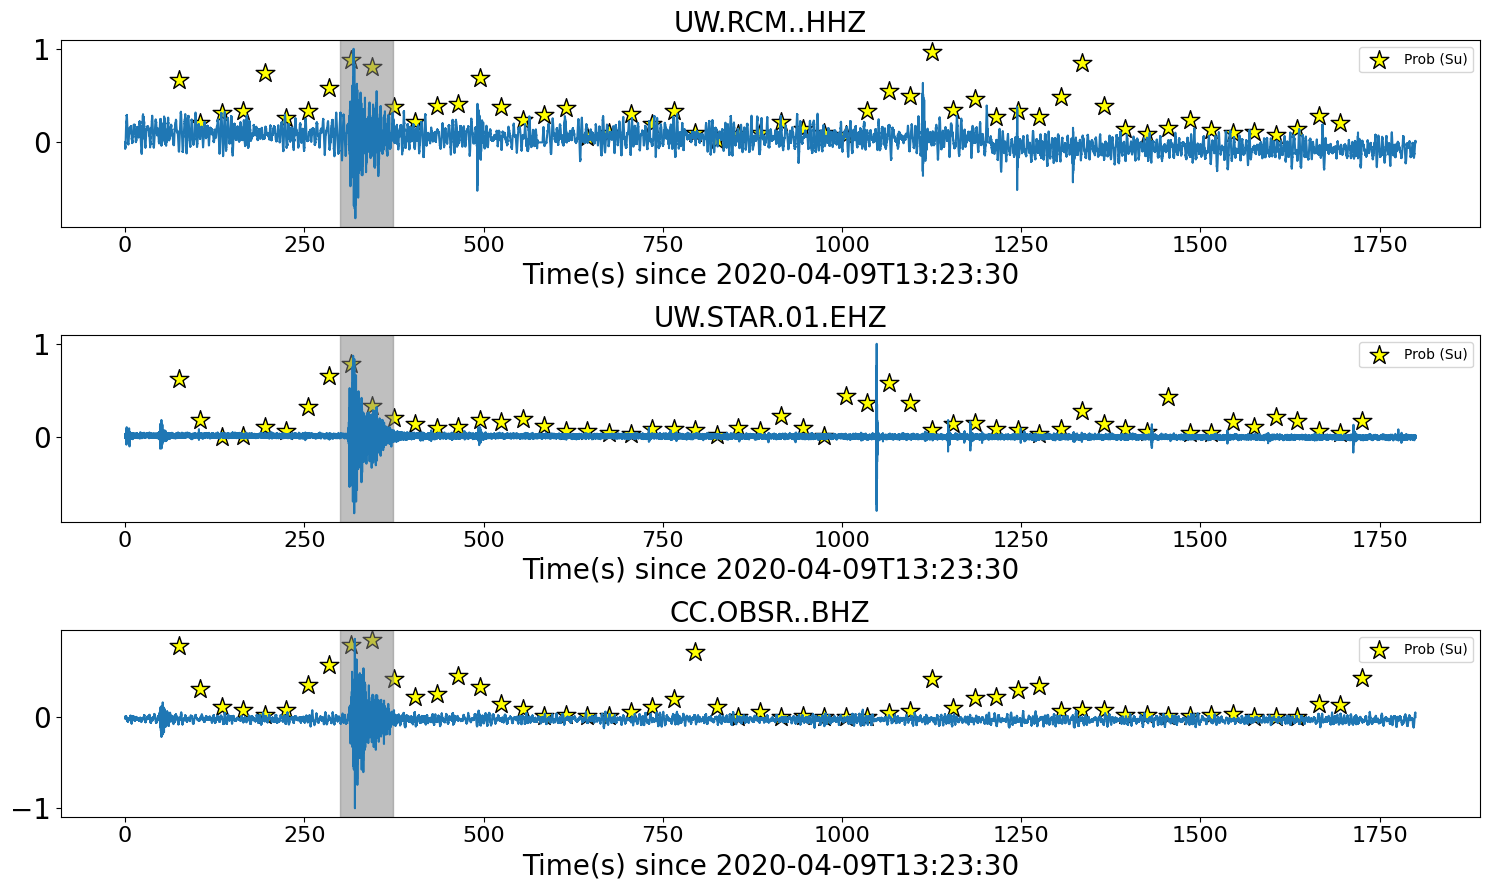

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import yaml
import obspy

# Load the configuration file
with open('../Common_Scripts/config.yml', 'r') as stream:
    config = yaml.safe_load(stream)
    
# starttime from where we want to run the detector
starttime = obspy.UTCDateTime(config['starttime'])



plt.rcParams['xtick.labelsize'] = 16  # Font size for xtick labels
plt.rcParams['ytick.labelsize'] = 20  # Font size for ytick labels

fig, axs = plt.subplots(len(st_overall_data), 1, figsize=(15, 3*len(st_overall_data)))

for k in range(len(st_overall_data)):
    axs[k].plot(st_overall_times[k], st_overall_data[k] / np.max(abs(st_overall_data[k])))
    axs[k].set_title(st_overall[k][0].id, fontsize=20)
    colors = ['black', 'blue', 'green', 'red']
    #for i in range(len(index_stns[k])):
        #axs[k].axvline(30 * index_stns[k][i] + 75, ls='--', color=colors[int(result_stns[k][i])])
    axs[k].scatter(30 * np.array(index_stns[k]) + 75, np.array(prob_stns[k])[:, :, 3], ec='k', marker='*', c='yellow', s=200, label='Prob (Su)')
    axs[k].legend()
    axs[k].set_xlabel('Time(s) since ' + str(starttime).split('.')[0], fontsize=20)
    axs[k].axvspan(300, 373, color='gray', alpha=0.5)  # Add a lightly shaded box between 300 and 700 seconds

plt.tight_layout()  # Adjust subplots to avoid overlap
plt.show()
